In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Работа с временем в python

#### Datetime

In [3]:
from datetime import datetime

In [4]:
dt = datetime(year=2021, month=3, day=1, hour=18, minute=30)

In [5]:
dt

datetime.datetime(2021, 3, 1, 18, 30)

In [6]:
dt.year, dt.month, dt.second, dt.minute, dt.hour

(2021, 3, 0, 30, 18)

In [7]:
str(dt)

'2021-03-01 18:30:00'

In [8]:
# кастомный формат вывода

datetime.strftime(dt, '%d-%m-%Y %H:%M:%S')

'01-03-2021 18:30:00'

In [9]:
# получить datetime из строки
datetime.strptime('01-03-2021 18:30:00', '%d-%m-%Y %H:%M:%S')

datetime.datetime(2021, 3, 1, 18, 30)

#### Timestamp

Количество секунд прошедших с 1 января 1970 года 00:00:00

In [123]:
123401234

123401234

In [10]:
dt.timestamp()

1614612600.0

In [11]:
dt.fromtimestamp(1)

datetime.datetime(1970, 1, 1, 3, 0, 1)

In [12]:
dt.utcfromtimestamp(1)

datetime.datetime(1970, 1, 1, 0, 0, 1)

#### Timedelta

In [13]:
from datetime import timedelta

In [14]:
dt2 = datetime(year=2021, month=3, day=1, hour=21, minute=30)

In [15]:
delta = dt2 - dt

In [16]:
delta

datetime.timedelta(seconds=10800)

In [17]:
timedelta(minutes=15, hours=1, days=3)

datetime.timedelta(days=3, seconds=4500)

#### iso8601 - международный формат

In [18]:
# международный формат даты/времени iso8601
dt.isoformat()

'2021-03-01T18:30:00'

In [19]:
# международный формат duration
'P1D'
'PT1H'
'PT3M'
'P1DT1H3M'

'P1DT1H3M'

In [20]:
import isodate

isodate.parse_duration('P1DT1H3M')

datetime.timedelta(days=1, seconds=3780)

### Работа с временем в pandas

In [23]:
pd.to_datetime('2021')

Timestamp('2021-01-01 00:00:00')

In [24]:
pd.to_datetime('2021-01-01T12:01:01')

Timestamp('2021-01-01 12:01:01')

In [25]:
pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03'])

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq=None)

In [26]:
pd.date_range(start='2021-03-01T18:30', end='2021-03-01T21:30', freq='min')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 18:31:00',
               '2021-03-01 18:32:00', '2021-03-01 18:33:00',
               '2021-03-01 18:34:00', '2021-03-01 18:35:00',
               '2021-03-01 18:36:00', '2021-03-01 18:37:00',
               '2021-03-01 18:38:00', '2021-03-01 18:39:00',
               ...
               '2021-03-01 21:21:00', '2021-03-01 21:22:00',
               '2021-03-01 21:23:00', '2021-03-01 21:24:00',
               '2021-03-01 21:25:00', '2021-03-01 21:26:00',
               '2021-03-01 21:27:00', '2021-03-01 21:28:00',
               '2021-03-01 21:29:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', length=181, freq='T')

In [32]:
pd.date_range(freq='h', periods=4, start='2021-03-01T18:30')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 19:30:00',
               '2021-03-01 20:30:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', freq='H')

### Pandas Series
#### Для одномерных временных рядов в питоне лучше всего подходит структура класса pandas Series. Позволяет из коробки рисовать временные ряды, делать сложные слайсы. Будучи частью pandas, совместима со всем ML стеком питона.

In [27]:
ts = pd.Series(np.random.rand(100), pd.date_range(start='2019-11-26', periods=100))

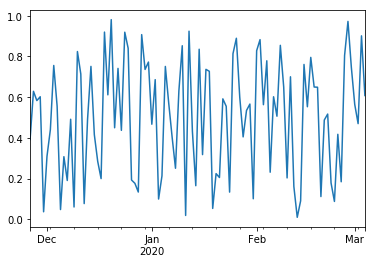

In [28]:
ts.plot()

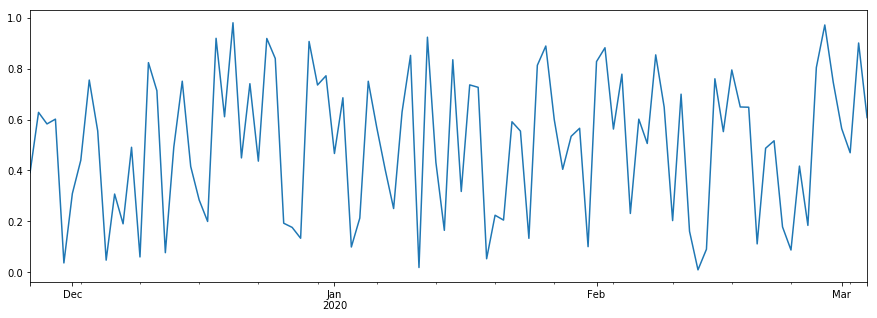

In [29]:
ts.plot(figsize=(15, 5))

In [30]:
# index select
ts[0]

0.39190859883860574

In [31]:
# datetime select
ts['2019-11-26']

0.39190859883860574

In [32]:
# index slice
ts[0:5]

2019-11-26    0.391909
2019-11-27    0.628581
2019-11-28    0.583076
2019-11-29    0.601942
2019-11-30    0.036525
Freq: D, dtype: float64

In [33]:
# datetime slice
ts['2019-11-26':'2019-11-29']

2019-11-26    0.391909
2019-11-27    0.628581
2019-11-28    0.583076
2019-11-29    0.601942
Freq: D, dtype: float64

In [34]:
# month, year slices

In [35]:
ts['2019-12']

2019-12-01    0.309094
2019-12-02    0.440458
2019-12-03    0.755650
2019-12-04    0.555401
2019-12-05    0.047530
2019-12-06    0.307370
2019-12-07    0.190345
2019-12-08    0.491295
2019-12-09    0.060101
2019-12-10    0.824117
2019-12-11    0.713635
2019-12-12    0.076808
2019-12-13    0.491840
2019-12-14    0.751102
2019-12-15    0.415692
2019-12-16    0.284155
2019-12-17    0.199640
2019-12-18    0.919733
2019-12-19    0.611303
2019-12-20    0.980870
2019-12-21    0.449444
2019-12-22    0.741237
2019-12-23    0.436761
2019-12-24    0.919123
2019-12-25    0.840482
2019-12-26    0.192711
2019-12-27    0.176264
2019-12-28    0.133585
2019-12-29    0.907240
2019-12-30    0.736122
2019-12-31    0.772386
Freq: D, dtype: float64

In [36]:
ts['2019']

2019-11-26    0.391909
2019-11-27    0.628581
2019-11-28    0.583076
2019-11-29    0.601942
2019-11-30    0.036525
2019-12-01    0.309094
2019-12-02    0.440458
2019-12-03    0.755650
2019-12-04    0.555401
2019-12-05    0.047530
2019-12-06    0.307370
2019-12-07    0.190345
2019-12-08    0.491295
2019-12-09    0.060101
2019-12-10    0.824117
2019-12-11    0.713635
2019-12-12    0.076808
2019-12-13    0.491840
2019-12-14    0.751102
2019-12-15    0.415692
2019-12-16    0.284155
2019-12-17    0.199640
2019-12-18    0.919733
2019-12-19    0.611303
2019-12-20    0.980870
2019-12-21    0.449444
2019-12-22    0.741237
2019-12-23    0.436761
2019-12-24    0.919123
2019-12-25    0.840482
2019-12-26    0.192711
2019-12-27    0.176264
2019-12-28    0.133585
2019-12-29    0.907240
2019-12-30    0.736122
2019-12-31    0.772386
Freq: D, dtype: float64

In [37]:
for attr in dir(ts):
    if not attr.startswith('_'):
        print(attr)

T
abs
add
add_prefix
add_suffix
agg
aggregate
align
all
any
append
apply
argmax
argmin
argsort
array
as_matrix
asfreq
asof
astype
at
at_time
autocorr
axes
base
between
between_time
bfill
bool
clip
clip_lower
clip_upper
combine
combine_first
compound
compress
copy
corr
count
cov
cummax
cummin
cumprod
cumsum
data
describe
diff
div
divide
divmod
dot
drop
drop_duplicates
droplevel
dropna
dtype
dtypes
duplicated
empty
eq
equals
ewm
expanding
factorize
ffill
fillna
filter
first
first_valid_index
flags
floordiv
from_array
ftype
ftypes
ge
get
get_dtype_counts
get_ftype_counts
get_values
groupby
gt
hasnans
head
hist
iat
idxmax
idxmin
iloc
imag
index
infer_objects
interpolate
is_monotonic
is_monotonic_decreasing
is_monotonic_increasing
is_unique
isin
isna
isnull
item
items
itemsize
iteritems
ix
keys
kurt
kurtosis
last
last_valid_index
le
loc
lt
mad
map
mask
max
mean
median
memory_usage
min
mod
mode
mul
multiply
name
nbytes
ndim
ne
nlargest
nonzero
notna
notnull
nsmallest
nunique
pct_change
pipe


In [38]:
# Из минусов - не самая быстрая структура данных

#### 2 хорошие библиотеки для визуализации временных рядов - bokeh и plotly. Делают анализ очень интерактивным.

In [39]:
from load_dataset import Dataset
import plotting

In [40]:
plotting.plot_ts(ts)

Loading BokehJS ...

In [41]:
plotting.plot_ts(ts, ts.shift(1))

Loading BokehJS ...